In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
from collections import defaultdict

from utils import plot_model_trajectories
from utils import ENV3

from models.env3 import Random, MostExpensive, LogReg, SVCModel, TripletLossReward

from tqdm import tqdm_notebook

import config

%matplotlib inline

Using TensorFlow backend.


In [3]:
results = defaultdict(list) # modelname : list  with shape n_runs x n_steps

In [6]:
%%time
ENV_URL = config.ENV3_URL
KEY = config.KEY

env = ENV3(key=KEY, url=ENV_URL)

n_runs = 3
n_steps = 100

models = {
    #'Random' : Random(),
    #'MostExpensive' : MostExpensive(),
    #'LogReg' : LogReg(),
    #'LogReg_retrain20' : LogReg(retrain=20),
    #'LogReg*price' : LogReg(price_reweight=True),
    #'LogReg*price_retrain20' : LogReg(price_reweight=True, retrain=20),
    #'SVC' : SVCModel(),
    #'SVC_retrain20' : SVCModel(retrain=20),
    #'SVC*price' : SVCModel(price_reweight=True),
    #'SVC*price_retrain20' : SVCModel(price_reweight=True, retrain=20),
    'TripletLossReward_0_10_10_1_30_0': TripletLossReward(),
    'TripletLossReward_0_10_10_1_20_0': TripletLossReward(hidden_size=20),
    'TripletLossReward_0_10_10_1_30_0.3': TripletLossReward(dropout=0.3)
}

for model_name, model in models.items():
    
    model_name_entry = model_name + '_' + time.strftime('%H:%M')
    
    for n in tqdm_notebook(range(n_runs), desc=model_name, leave=True, position=0):
        # init model 
        history = env.reset()
        model.train(history)
        input_data = {
            'state' : history['next_state']
        }
        
        rewards = []
        for _ in tqdm_notebook(range(n_steps), desc='run %d' % n, leave=False, position=1):
            time.sleep(0.05)
            
            prediction = model.predict(input_data)
            res = env.predict(prediction) # get res for prediction
            
            input_data = {
                'state' : res['state']
            }
            reward = res['reward']
            rewards.append(reward)
            
        results[model_name_entry].append(rewards)

HBox(children=(IntProgress(value=0, description='TripletLossReward_0_10_10_1_30_0', max=3, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='run 0', style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='run 1', style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='run 2', style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='TripletLossReward_0_10_10_1_20_0', max=3, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='run 0', style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='run 1', style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='run 2', style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='TripletLossReward_0_10_10_1_30_0.3', max=3, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='run 0', style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='run 1', style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='run 2', style=ProgressStyle(description_width='initial')), HTML(value='')))


Wall time: 4min 35s


,Model,Score,Conversion Rate
1,TripletLossReward_0.25_12:18,30126,0.336667
4,TripletLossReward_1_12:24,27088,0.296667
3,TripletLossReward_0.75_12:22,25621,0.270000
2,TripletLossReward_0.5_12:20,24680,0.300000
0,TripletLossReward_0_12:17,17678,0.246667


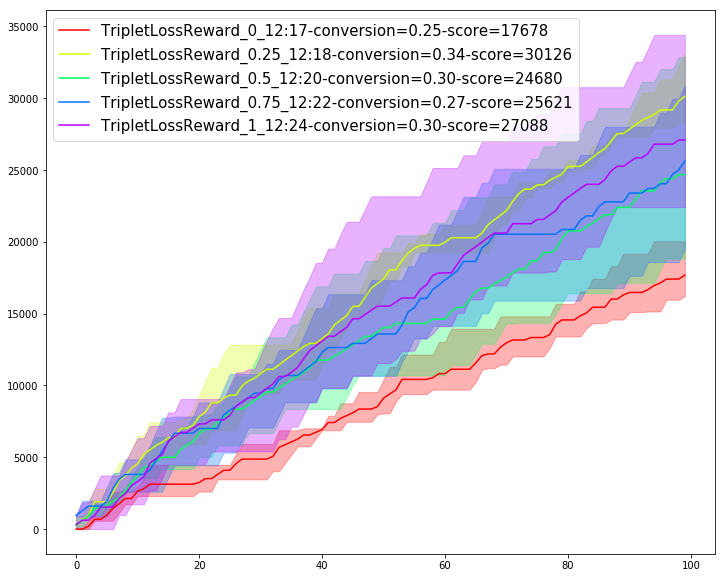

In [5]:
plot_model_trajectories(results)

,Model,Score,Conversion Rate
1,TripletLossReward_0.25_12:18,30126,0.336667
7,TripletLossReward_0_10_10_1_30_0.3_13:12,29576,0.356667
4,TripletLossReward_1_12:24,27088,0.296667
3,TripletLossReward_0.75_12:22,25621,0.270000
2,TripletLossReward_0.5_12:20,24680,0.300000
6,TripletLossReward_0_10_10_1_20_0_13:10,24645,0.293333
5,TripletLossReward_0_10_10_1_30_0_13:09,21979,0.323333
0,TripletLossReward_0_12:17,17678,0.246667


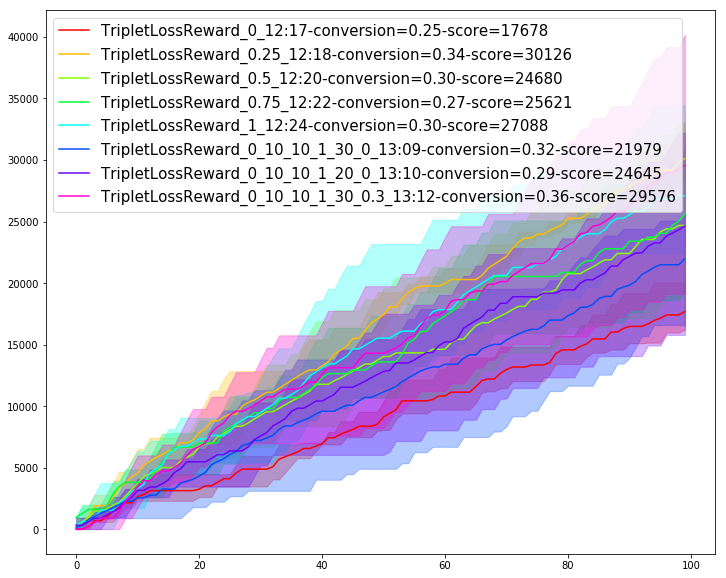

In [7]:
plot_model_trajectories(results)

,Model,Score,Conversion Rate
0,TripletLossReward_12:11,28701,0.343333


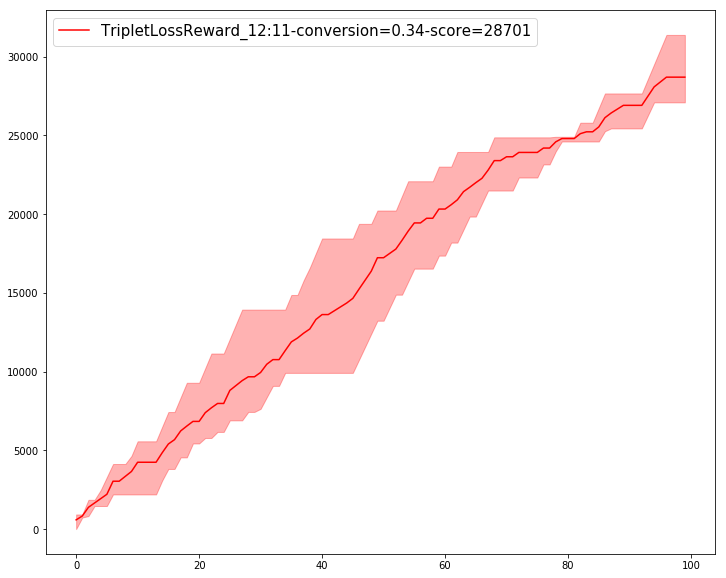

In [5]:
plot_model_trajectories(results)

,Model,Score,Conversion Rate
6,LogReg*price_16:46,35078,0.390000
7,LogReg*price_retrain20_16:48,31072,0.340000
11,SVC*price_retrain20_16:53,28073,0.310000
10,SVC*price_16:53,27402,0.313333
2,MostExpensive_16:21,26687,0.275000
1,MostExpensive_16:20,26093,0.270000
9,SVC_retrain20_16:52,21105,0.386667
5,LogReg_retrain20_16:45,14920,0.430000
3,LogReg_16:44,14735,0.380000
4,LogReg_16:45,14345,0.405000


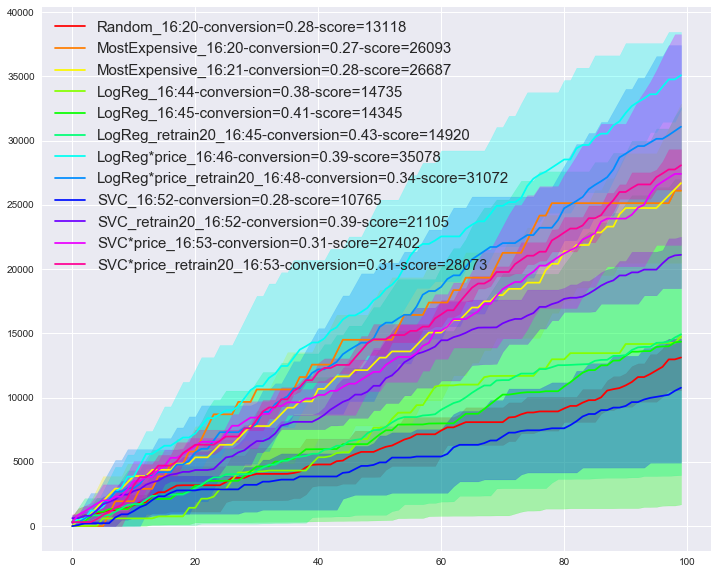

In [27]:
plot_model_trajectories(results)